In [459]:
import mdptoolbox as mdpt
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pprint as pp

##### Plot Functions

In [486]:
def plotValueFunc(filename, title, val_func, gridsize, side_len):
    x = np.linspace(0, side_len - 1, side_len) + 0.5
    y = np.linspace(side_len - 1, 0, side_len) + 0.5
    X, Y = np.meshgrid(x, y)

    fig = plt.figure(figsize=(12,8))
    ax = plt.axes()
    # choose color scale
    cmap = plt.cm.rainbow

    # add mapping
    min_val = float('{0:.2f}'.format(np.min(val_func)))
    max_val = float('{0:.2f}'.format(np.max(val_func)))
    norm = mpl.colors.Normalize(vmin=min_val, vmax= max_val)
    # add colorbar
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])
    fig.colorbar(sm, extend='both')

    # plot value function values and magnitudes
    for i, _ in enumerate(val_func):
        for j, action in enumerate(val_func[i]):
            plt.text(X[i,j], Y[i,j], '{0:.2f}'.format(val_func[i][j]),
                    horizontalalignment ='center', color = 'black', fontsize='x-large')
            ax.add_patch(
                mpl.patches.Rectangle((X[i,j]-0.5, Y[i,j]-0.5), 
                                      1, 1, color=cmap(norm(val_func[i,j]))))

    plt.title(title, fontsize='x-large')
    plt.xlim([0, side_len])
    plt.ylim([0, side_len])
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    plt.grid()
    plt.show()
    fig.savefig('outputs/gridworld/' + filename + '.png', bbox_inches='tight', facecolor=fig.get_facecolor())

In [461]:
def plotPolicy(filename, title, policy, gridsize, side_len):
    goal=(0,1)
    obstacles = [(1,1),(3,2)]
    zeros = np.zeros(gridsize)
    x = np.linspace(0, side_len - 1, side_len) + 0.5
    y = np.linspace(side_len - 1, 0, side_len) + 0.5
    X, Y = np.meshgrid(x, y)

    fig = plt.figure(figsize=(12,8))
    ax = plt.axes()
    
    max_ = 4
    min_ = 0
    cmap = plt.cm.rainbow
    norm = mpl.colors.Normalize(vmin=min_, vmax= max_)
        
    # goal
    ax.add_patch(mpl.patches.Rectangle((X[goal]-0.5, Y[goal]-0.5), 1, 1, color=cmap(norm(2))))

    # obstacle
    for _, obstacle in enumerate(obstacles):
        ax.add_patch(mpl.patches.Rectangle((X[obstacle]-0.5, Y[obstacle]-0.5), 1, 1, color=cmap(norm(max_))))

    for i, _ in enumerate(policy):
        for j, action in enumerate(policy[i]):
            # Plot result
            if action == 0: # left
                # Vectors point in negative X-direction
                ax.quiver(X[i,j], Y[i,j], -.4, 0, scale=1, units='xy', pivot='mid', zorder=10)
            elif action == 1: # right
                # Vectors point in positive X-direction
                ax.quiver(X[i,j], Y[i,j], .4, 0, scale=1, units='xy', pivot='mid', zorder=10)
            elif action == 2: # up
                # Vectors point in positive Y-direction
                ax.quiver(X[i,j], Y[i,j], 0, .4, scale=1, units='xy', pivot='mid', zorder=10)

    plt.title(title, fontsize='x-large')
    plt.xlim([0, side_len])
    plt.ylim([0, side_len])
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    plt.grid()
    plt.show()
    fig.savefig('outputs/gridworld/' + filename + '.png', bbox_inches='tight', facecolor=fig.get_facecolor())

##### Set Up Dictionaries for converting between state indexes and enumerated states

In [462]:
side_len = 5
S = side_len*side_len
s = 0

deathSpaces = [(1,1)]
goalx = 0
goaly = 1
goal= (goalx, goaly)
gridsize = (side_len, side_len)
discount = 0.1

StatetoInt = {}
InttoState = {}

for s_r in range(side_len):
    StatetoInt[s_r+1] = {}
    for s_c in range(side_len):
        InttoState[s] = [s_r+1,s_c+1]
        StatetoInt[s_r+1][s_c+1] = s
        s = s+1

In [463]:
InttoState[10]

[3, 1]

In [464]:
StatetoInt[3][3]

12

##### Transition Matrix

In [465]:
overshoot = 0.25
normal = 1-overshoot

In [466]:
#Move Left
MoveLeft = np.zeros((S,S))
for s_from in range(S):
    state_array_from = InttoState[s_from]
    s_r_from = state_array_from[0]
    s_c_from = state_array_from[1]
    for s_to in range(S):
        state_array_to = InttoState[s_to]
        s_r_to = state_array_to[0]
        s_c_to = state_array_to[1]
        #Left Edge Case
        if((s_c_from == 1) & (s_c_to == 1) & (s_r_from == s_r_to)):
            MoveLeft[s_from][s_to] = 1
        #Almost Left Edge Case
        elif((s_c_from == 2)  & (s_c_to == 1) & (s_r_from == s_r_to)):
            MoveLeft[s_from][s_to] = 1
        #Normal Case
        else:
            if ((s_c_from-1 == s_c_to) & (s_r_from == s_r_to)):
                MoveLeft[s_from][s_to] = normal
            elif ((s_c_from-2 == s_c_to) & (s_r_from == s_r_to)):
                MoveLeft[s_from][s_to] = overshoot

In [467]:
#Move Right
MoveRight = np.zeros((S,S))
for s_from in range(S):
    state_array_from = InttoState[s_from]
    s_r_from = state_array_from[0]
    s_c_from = state_array_from[1]
    for s_to in range(S):
        state_array_to = InttoState[s_to]
        s_r_to = state_array_to[0]
        s_c_to = state_array_to[1]
        #Right Edge Case
        if((s_c_from == side_len) & (s_c_to == side_len) & (s_r_from == s_r_to)):
            MoveRight[s_from][s_to] = 1
        #Almost Right Edge Case
        elif((s_c_from == side_len-1)  & (s_c_to == side_len) & (s_r_from == s_r_to)):
            MoveRight[s_from][s_to] = 1
        #Normal Case
        else:
            if ((s_c_from+1 == s_c_to) & (s_r_from == s_r_to)):
                MoveRight[s_from][s_to] = normal
            elif ((s_c_from+2 == s_c_to) & (s_r_from == s_r_to)):
                MoveRight[s_from][s_to] = overshoot

In [468]:
#Move Up
MoveUp = np.zeros((S,S))
for s_from in range(S):
    state_array_from = InttoState[s_from]
    s_r_from = state_array_from[0]
    s_c_from = state_array_from[1]
    for s_to in range(S):
        state_array_to = InttoState[s_to]
        s_r_to = state_array_to[0]
        s_c_to = state_array_to[1]
        #Top Edge Case
        if((s_r_from == 1) & (s_r_to == 1) & (s_c_from == s_c_to)):
            MoveUp[s_from][s_to] = 1
        #Almost Top Edge Case
        elif((s_r_from == 2)  & (s_r_to == 1) & (s_c_from == s_c_to)):
            MoveUp[s_from][s_to] = 1
        #Normal Case
        else:
            if ((s_r_from-1 == s_r_to) & (s_c_from == s_c_to)):
                MoveUp[s_from][s_to] = normal
            elif ((s_r_from-2 == s_r_to) & (s_c_from == s_c_to)):
                MoveUp[s_from][s_to] = overshoot

In [469]:
T = np.array([MoveLeft, MoveRight, MoveUp])

##### Reward Matrix

In [470]:
# create map of world
mapWorld = np.array([
    [0,0,0,0,0],
    [0,1,0,0,0],
    [0,0,0,0,0],
    [0,0,1,0,0],
    [0,0,0,0,0],
])

# transitionProb = np.zeros((gridsize,gridsize))

# for i in range(gridsize):
#     for j in range(gridsize):
#         p = 0.1 if i != j else 0.8
#         transitionProb[i][j] = p
# transitionProb

In [471]:
def reward(world, goal, obs_r, edge_r, goal_r):
#     obs_r = -200
#     edge_r = -10
#     goal_r = 100
    r,c = world.shape
    reward = np.zeros((c, r))

    for i in range(r):
        for j in range(c):
            if world[j][i] == 1:
                reward[j][i] = obs_r
            if i == c-1 or i == 0:
                reward[j][i] = edge_r
            if (j,i) == goal:
                reward[j][i] = goal_r
    return reward

In [472]:
# print(reward(mapWorld, (goalx, goaly)))
R = reward(mapWorld, goal, -200, -10, 100).ravel()
R.reshape((side_len, side_len))

array([[ -10.,  100.,    0.,    0.,  -10.],
       [ -10., -200.,    0.,    0.,  -10.],
       [ -10.,    0.,    0.,    0.,  -10.],
       [ -10.,    0., -200.,    0.,  -10.],
       [ -10.,    0.,    0.,    0.,  -10.]])

##### Value Iteration

In [488]:
vi = mdpt.mdp.ValueIteration(T, R, discount)
vi.run()
vi_val_func = np.array(vi.V).reshape(gridsize)
print("Learned value function", vi_val_func)
print("iterations: ", vi.iter)
print("time", vi.time)
print("policy: ")
vi_policy = np.array(vi.policy).reshape(gridsize)
pp.pprint(vi_policy)
print("key: l -> 0 , r -> 1, u -> 2")

('Learned value function', array([[-1.47031250e+00,  1.11100000e+02,  8.28578125e+00,
         3.38906250e+00, -9.54828125e+00],
       [-1.01568750e+01, -1.88900000e+02,  8.18750000e-01,
         3.29375000e-01, -9.96312500e+00],
       [-9.99546875e+00,  1.51562500e-02,  2.59062500e-01,
         1.01093750e-01, -9.99078125e+00],
       [-1.10062500e+01, -1.10250000e+00, -1.99968281e+02,
         1.09375000e-02, -1.10000000e+01],
       [-1.00076563e+01, -1.87500000e-02, -2.50156250e-01,
         1.56250000e-03, -1.00062500e+01]]))
('iterations: ', 4)
('time', 0.0004329681396484375)
policy: 
array([[1, 2, 0, 0, 0],
       [2, 2, 2, 2, 0],
       [1, 1, 2, 2, 0],
       [2, 0, 2, 2, 2],
       [1, 1, 1, 2, 0]])
key: l -> 0 , r -> 1, u -> 2


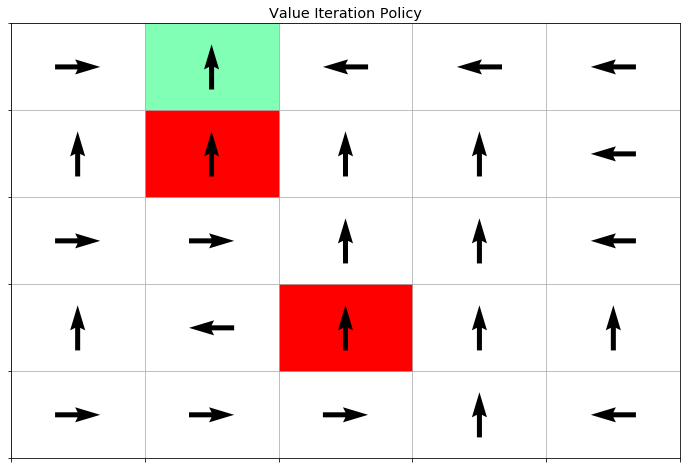

In [474]:
plotPolicy('vi_policy', 'Value Iteration Policy', vi_policy, gridsize, side_len)

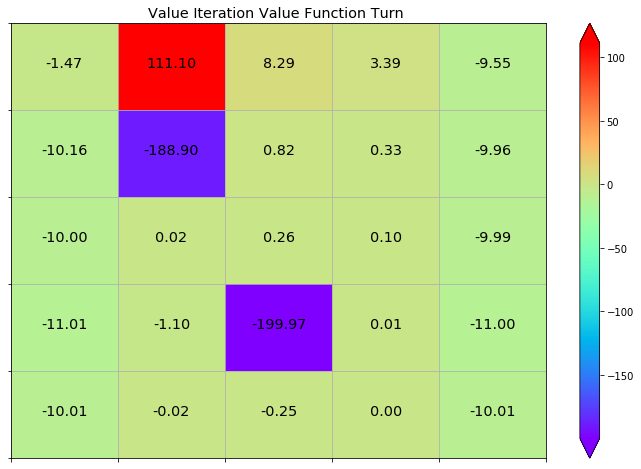

In [491]:
plotValueFunc('vi_value_func', 'Value Iteration Value Function Turn ', 
              vi_val_func, gridsize, side_len)

##### Q Learning

In [475]:
ql = mdpt.mdp.QLearning(T, R, discount, n_iter=10000)
ql.run()

Q = ql.Q
# pp.pprint(Q)

ql_val_func = np.array(ql.V).reshape(gridsize)
print("Learned value function", q_val_func)

ql_policy = np.array(ql.policy).reshape(gridsize)
print("Learned optimal policy")
pp.pprint(ql_policy.T)

ql_mean_disc = np.array(ql.mean_discrepancy)
print("Vector of V discrepancy mean over 100 iterations: ", ql_mean_disc)


('Learned value function', array([[ 7.20041678e+02,  9.88916322e+02,  7.13260979e+02,
         3.96492400e+02,  6.66539393e+01],
       [ 1.31877207e+02,  4.24092304e+00,  3.52432935e+00,
         4.01792545e+01,  2.12101559e+00],
       [ 6.42902734e+01,  8.25267818e+00,  1.08818048e+01,
         2.11479463e-01, -4.15301939e-01],
       [-9.28777431e-01,  2.18501109e-02,  6.37983370e-01,
         1.93164879e-02, -7.54544764e-01],
       [-5.13950652e+00,  5.59022284e-04,  1.53492640e-01,
         4.93726296e-04, -6.03708754e-01]]))
Learned optimal policy
array([[1, 1, 0, 0, 2],
       [2, 2, 1, 0, 1],
       [0, 2, 2, 1, 1],
       [0, 2, 0, 2, 2],
       [2, 1, 0, 0, 2]])
('Vector of V discrepancy mean over 100 iterations: ', array([2.82255821e+00, 1.06243626e+00, 1.99151222e-01, 1.79526161e-01,
       1.04068277e-01, 8.56631209e-02, 5.39311441e-02, 1.40742968e-01,
       7.53225842e-02, 1.92072796e-01, 4.93026813e-02, 1.91078986e-02,
       4.08175829e-02, 9.54649281e-02, 2.73069064

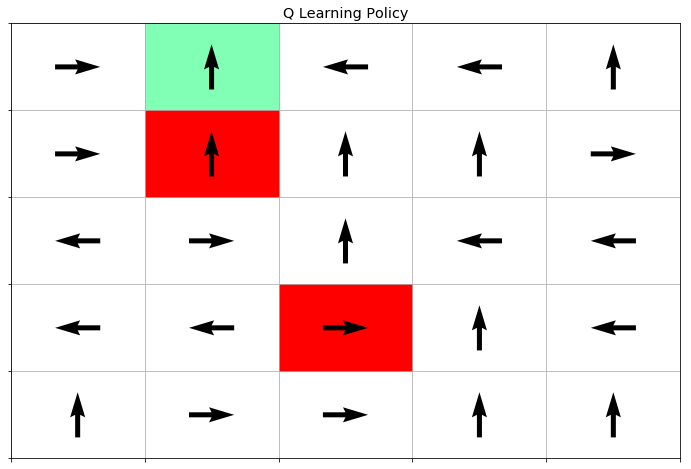

In [476]:
plotPolicy('ql_policy', 'Q Learning Policy', ql_policy, gridsize, side_len)

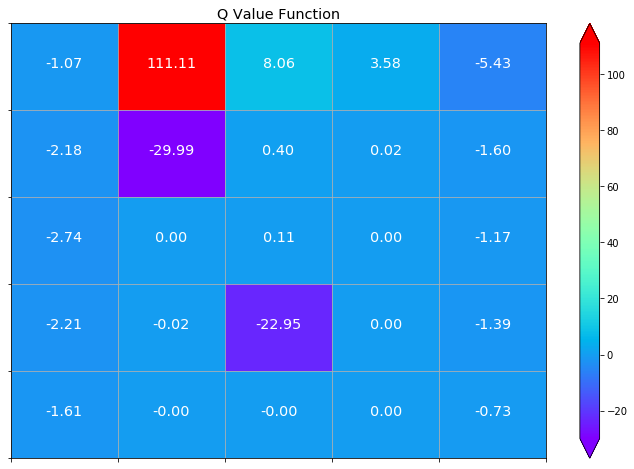

In [484]:
plotValueFunc('ql_value_func', 'Q Value Function', ql_val_func, gridsize, side_len)

##### Policy Iteration

In [478]:
pi = mdpt.mdp.PolicyIteration(T, R, discount)
pi.run()

pi_val_func = np.array(pi.V).reshape(gridsize)
print("Value Function: ", pi.V)
print
pi_policy = np.array(pi.policy).reshape(gridsize)
print("Optimal Policy: ", pi_policy)
print
print("Iterations: ", pi.iter)
print
print("Time: ", pi.time)

('Value Function: ', (-1.4592453616843848, 111.11111111111111, 8.296852199291225, 3.40004169272462, -9.537575568063373, -10.145924536168438, -188.88888888888889, 0.8296852199291225, 0.340004169272462, -9.953757556806337, -9.991534849254743, 0.022986111111111117, 0.2696476964769648, 0.11050135501355016, -9.98497120596206, -11.003013227098316, -1.1003013227098317, -199.95903429226598, 0.016787705857827816, -10.997716779367313, -10.007644023637319, -0.018637984176809223, -0.24984699296234825, 0.00402161181467584, -10.005944553937958))

('Optimal Policy: ', array([[1, 2, 0, 0, 0],
       [2, 2, 2, 2, 0],
       [1, 1, 2, 2, 0],
       [2, 0, 2, 2, 2],
       [1, 1, 1, 2, 0]]))

('Iterations: ', 4)

('Time: ', 0.003756999969482422)


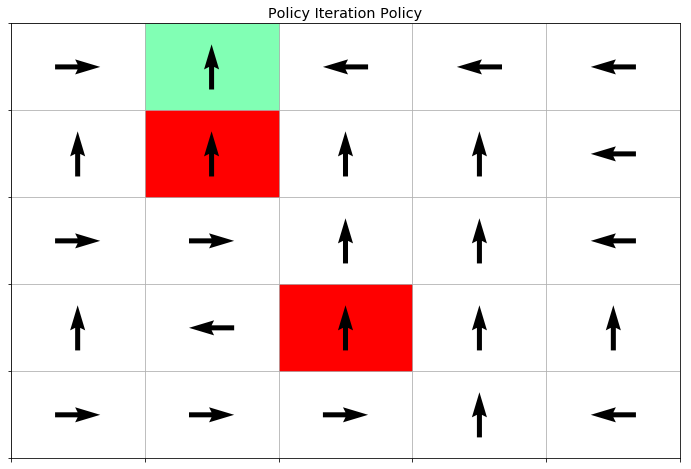

In [479]:
plotPolicy('pi_policy', 'Policy Iteration Policy', pi_policy, gridsize, side_len)

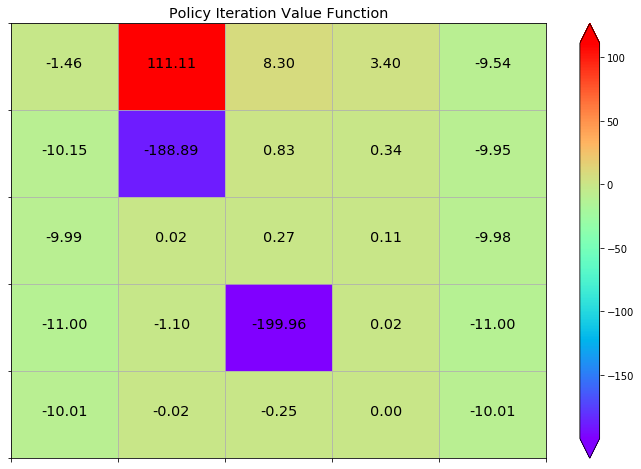

In [487]:
plotValueFunc('pi_value_func', 'Policy Iteration Value Function', pi_val_func, gridsize, side_len)

##### MDP

In [481]:
x = mdpt.mdp.MDP(T, R, discount, 0.1, 400000)

print("Optimal Value Function ", x.V)
print( "Optimal Policy", x.policy)

('Optimal Value Function ', None)
('Optimal Policy', None)
